# Exploratory Data Analysis of the Misclassifications
---

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in Original DataFrame

In [6]:
csv_file = "../data/drugs_2020_simply_imputed.csv"
df = pd.read_csv(csv_file)
print(df.shape)
df.head()

(16829, 64)


,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typemony,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,1.0,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0
1,1.0,64.0,0,0,1.0,211.0,1.0,1.0,1,51,...,1.0,0,1.0,1.193400e+06,5967.000000,3.0,27.0,108.0,87.0,0.0
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,1.0,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0
3,2.0,55.0,0,0,1.0,211.0,77.0,1.0,1,65,...,1.0,0,1.0,1.030000e+04,4.120000,5.0,13.0,37.0,30.0,0.0
4,1.0,30.0,0,0,1.0,211.0,6.0,1.0,1,87,...,1.0,0,1.0,1.692000e+05,84.600000,6.0,25.0,137.0,110.0,2.0


## Read in Misclassification DataFrames

In [7]:
# Misclassifications from Neural Network (2 models, 1 using SMOTE and 1 using UnderSample Majority)
df1 = pd.read_csv('../data/NN_misclass_df.csv', index_col='Unnamed: 0')
print(df1.shape)
df1.head()

(1090, 65)


,accgdln,age,altdum,amttotal,casetype,citwhere,combdrg2,crimhist,disposit,district,...,typeoths,unit1,mwgt1,wgt1,xcrhissr,xfolsor,xmaxsor,xminsor,sentrnge,no_of_misclass
0,1.0,20.0,0,0,1.0,211.0,6.0,1.0,1,43,...,0,1.0,6.356099e+07,85104.433315,1.0,17.0,30.0,24.0,8.0,1
2,1.0,28.0,0,0,1.0,211.0,3.0,1.0,1,48,...,0,2.0,2.000000e+06,2000.000000,6.0,27.0,162.0,130.0,2.0,1
5,8.0,22.0,0,125,2.0,211.0,4.0,1.0,1,87,...,0,1.0,6.356099e+07,85104.433315,1.0,2.0,6.0,0.0,0.0,1
7,1.0,30.0,0,0,1.0,49.0,3.0,1.0,1,39,...,0,1.0,8.900000e+06,8900.000000,1.0,29.0,108.0,87.0,2.0,1
10,1.0,31.0,0,0,1.0,211.0,6.0,1.0,1,62,...,0,1.0,7.154000e+05,35.770000,5.0,25.0,125.0,100.0,8.0,1


In [ ]:
demographics = ['age', 'newrace', 'monsex', 'monrace', 'neweduc', 'newcnvtn', 'citwhere', 'newcit', 'prisdum']

Text(0.5, 1.0, 'Percentage of Races that Received a Prison Sentence')

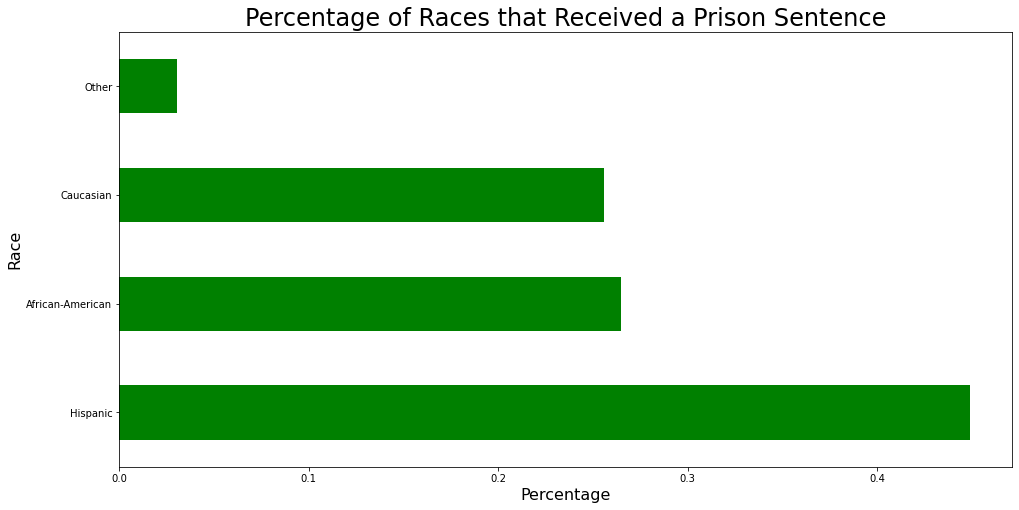

In [8]:
plt.figure(figsize=(16,8))

df[df['prisdum']==1]['newrace'].map({6.0: 'Other', 1.0: 'Caucasian', 2.0: 'African-American', 3.0:'Hispanic'}).value_counts(normalize=True).plot(kind='barh', color='green')

plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Race', fontsize=16)
plt.title('Percentage of Races that Received a Prison Sentence', fontsize=24)

Text(0.5, 1.0, 'Percentage of Races that Received a Non-Prison Sentence')

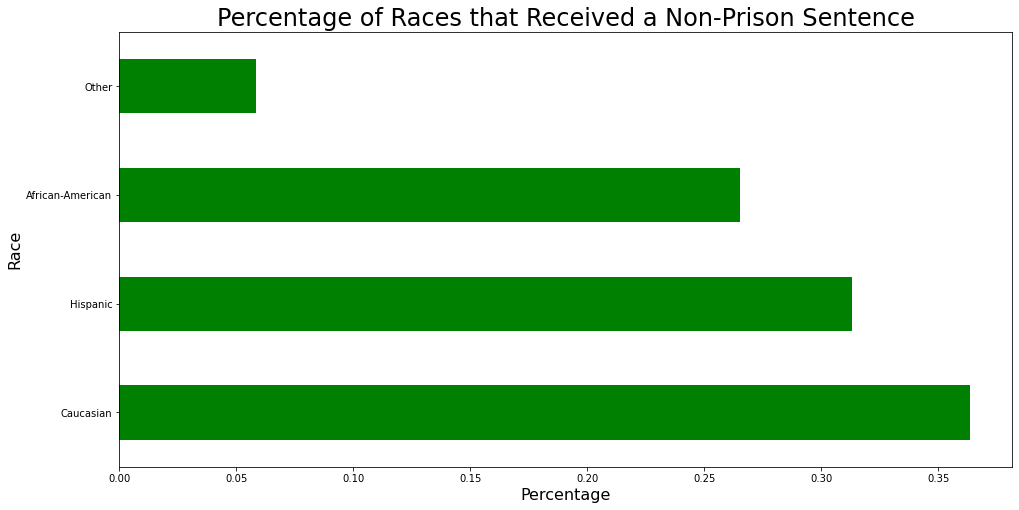

In [9]:
plt.figure(figsize=(16,8))

df[df['prisdum']==0]['newrace'].map({6.0: 'Other', 1.0: 'Caucasian', 2.0: 'African-American', 3.0:'Hispanic'}).value_counts(normalize=True).plot(kind='barh', color='green')

plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Race', fontsize=16)
plt.title('Percentage of Races that Received a Non-Prison Sentence', fontsize=24)

Text(0.5, 1.0, 'Misclassified: Percentage of Races that Received a Prison Sentence')

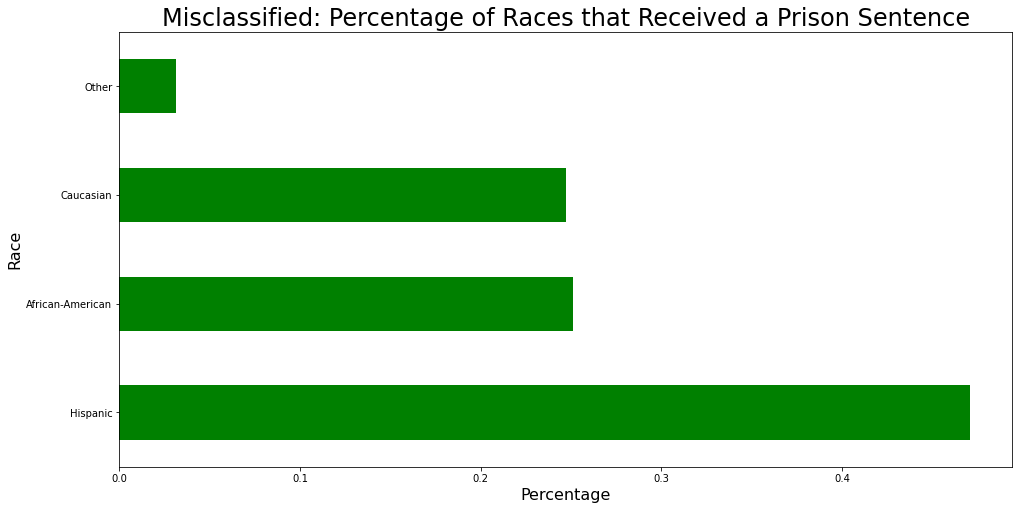

In [12]:
plt.figure(figsize=(16,8))

df1[df1['prisdum']==1]['newrace'].map({6.0: 'Other', 1.0: 'Caucasian', 2.0: 'African-American', 3.0:'Hispanic'}).value_counts(normalize=True).plot(kind='barh', color='green')

plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Race', fontsize=16)
plt.title('Misclassified: Percentage of Races that Received a Prison Sentence', fontsize=24)

Text(0.5, 1.0, 'Misclassified: Percentage of Races that Received a Non-Prison Sentence')

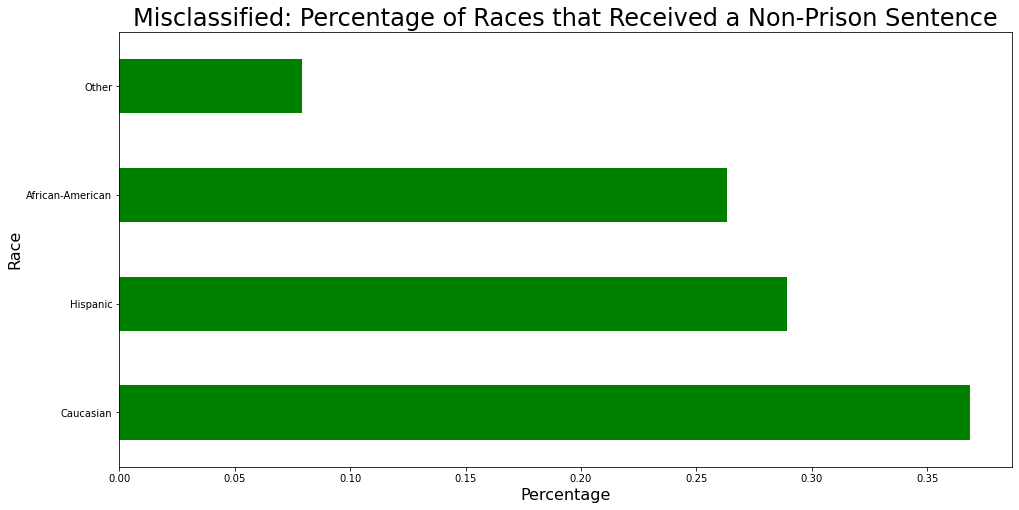

In [13]:
plt.figure(figsize=(16,8))

df1[df1['prisdum']==0]['newrace'].map({6.0: 'Other', 1.0: 'Caucasian', 2.0: 'African-American', 3.0:'Hispanic'}).value_counts(normalize=True).plot(kind='barh', color='green')

plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Race', fontsize=16)
plt.title('Misclassified: Percentage of Races that Received a Non-Prison Sentence', fontsize=24)